# MLB Metrics Helpers Examples

Example uses for helper functions in mlb_metrics_helpers.py

### Import libraries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import mlb_metrics_helpers

import warnings
warnings.filterwarnings("ignore")

### Create scatter plot of pitch locations, colored by pitch type

In [2]:
# get pitcher data
mikolaus_id = mlb_metrics_helpers.player_id("Mikolas", "Miles")
mikolaus_general_stats = mlb_metrics_helpers.player_general_metrics(
    mikolaus_id, timeline_type="career"
)
mikolaus_timeline = mlb_metrics_helpers.parse_career_timeline(mikolaus_general_stats)
mikolaus_specific_stats = mlb_metrics_helpers.player_specific_metrics(
    mikolaus_id,
    metric_type="pitching",
    start_dt=mikolaus_timeline[0],
    end_dt=mikolaus_timeline[1],
)

mikolaus_specific_stats

Gathering player lookup table. This may take a moment.
Gathering Player Data


,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
0,FF,2018-05-04,94.2,-2.45,6.51,"Mikolas, Miles",592178,571945,double,hit_into_play,...,3,0,3,0,3,Standard,Standard,202.0,-0.053,0.718
1,CU,2018-05-04,78.3,-2.27,6.45,"Mikolas, Miles",592178,571945,NaN,called_strike,...,3,0,3,0,3,Standard,Standard,34.0,0.000,-0.051
2,SL,2018-05-04,86.3,-2.46,6.63,"Mikolas, Miles",592178,571945,NaN,called_strike,...,3,0,3,0,3,Standard,Standard,153.0,0.000,-0.036
3,SI,2018-05-04,93.2,-1.97,6.52,"Mikolas, Miles",450314,571945,field_out,hit_into_play,...,3,0,3,0,3,Standard,Standard,235.0,0.020,-0.255
4,CU,2018-05-04,77.5,-2.25,6.45,"Mikolas, Miles",450314,571945,NaN,ball,...,3,0,3,0,3,Standard,Standard,33.0,0.000,0.033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13015,CU,2018-05-10,80.5,-2.14,6.54,"Mikolas, Miles",608671,571945,NaN,ball,...,1,1,0,0,1,Standard,Standard,28.0,0.000,0.043
13016,CU,2018-05-10,79.1,-2.12,6.42,"Mikolas, Miles",608671,571945,NaN,foul,...,1,1,0,0,1,Strategic,Standard,31.0,0.000,0.000
13017,FF,2018-05-10,97.1,-1.91,6.53,"Mikolas, Miles",608671,571945,NaN,ball,...,1,1,0,0,1,Standard,Standard,209.0,0.000,0.023
13018,FF,2018-05-10,94.4,-2.18,6.61,"Mikolas, Miles",608671,571945,NaN,foul_bunt,...,1,1,0,0,1,Standard,Standard,201.0,0.000,-0.051


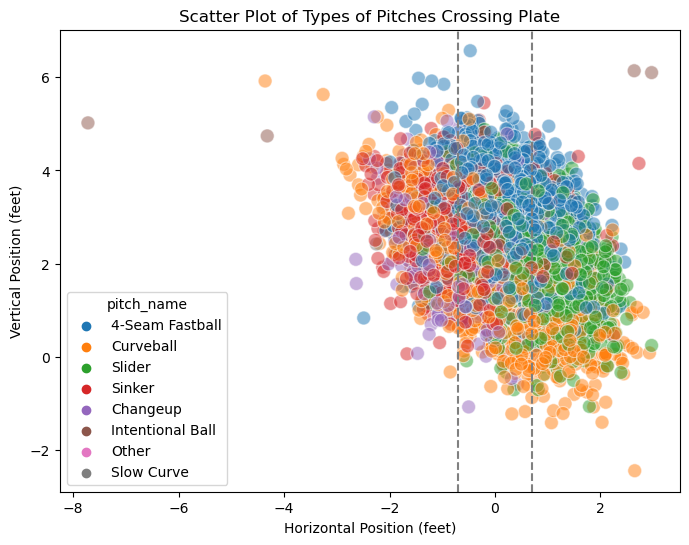

In [4]:
scatter = mlb_metrics_helpers.plate_crossing_scatter(mikolaus_specific_stats, "pitching")
scatter.show()

### Create various machine learning models for classifying outcome of pitch (pitch zone)

In [4]:
mikolaus_model_data = mlb_metrics_helpers.pitcher_model_data(mikolaus_specific_stats)
mikolaus_model_data

,pitch_type,release_speed,release_pos_x,release_pos_y,release_spin_rate,spin_axis,p_throws,vx0,vy0,vz0,ax,ay,az,zone
0,FF,94.2,-2.45,54.55,2319.0,202.0,R,9.733690,-136.547039,-8.347547,-8.977545,29.991442,-13.601673,14.0
1,CU,78.3,-2.27,55.67,2757.0,34.0,R,3.213866,-113.685528,0.330972,6.686118,23.277507,-43.409795,5.0
2,SL,86.3,-2.46,54.72,2371.0,153.0,R,5.640100,-125.479792,-4.522315,2.195190,23.817224,-25.240157,5.0
3,SI,93.2,-1.97,54.09,2351.0,235.0,R,7.685924,-135.392311,-7.774589,-18.646288,30.631840,-18.774989,8.0
4,CU,77.5,-2.25,55.18,2640.0,33.0,R,1.014720,-112.477903,2.890067,6.294862,22.392686,-43.087035,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13015,CU,80.5,-2.14,55.44,2600.0,28.0,R,5.529310,-116.837519,-5.378493,4.665743,23.929388,-42.397880,14.0
13016,CU,79.1,-2.12,54.36,2558.0,31.0,R,0.761371,-115.012096,0.239371,6.480165,24.726793,-43.542036,13.0
13017,FF,97.1,-1.91,54.09,2253.0,209.0,R,9.395963,-140.900648,-8.466190,-9.829562,31.611886,-16.812228,14.0
13018,FF,94.4,-2.18,54.32,2161.0,201.0,R,6.675660,-137.256735,-6.066099,-8.243672,30.168799,-13.864550,2.0


In [5]:
sklearn_model_types = ["logistic_regression", "random_forest", "gradient_boosting", "hist_gradient_boosting"]
for model_type in sklearn_model_types:
    model, accuracy = mlb_metrics_helpers.tested_model(mikolaus_model_data, "zone", model_type)
    print(f"{model_type} accuracy: {accuracy}")
    
    

logistic_regression accuracy: 0.7368421052631579
random_forest accuracy: 0.6932330827067669
gradient_boosting accuracy: 0.6699248120300751
hist_gradient_boosting accuracy: 0.718796992481203


In [6]:
random_row = mikolaus_model_data.sample(n=1, random_state=0)
random_row_features = random_row.drop(columns=["zone"])
random_row_target = random_row["zone"]

prediction, prediction_probas = mlb_metrics_helpers.model_prediction(model, random_row_features)
print(f"Correct zone: {random_row_target.values[0]}")
print(f"Prediction: {prediction}")
print(f"Prediction probas: {prediction_probas}")

Correct zone: 4.0
Prediction: 4.0
Prediction probas: [0.0008198147139564081, 0.009053017037155282, 0.00020814096732765672, 0.9034702057458447, 0.07367168237426246, 0.00029051593708550954, 0.00027222741992500297, 0.008587308856748199, 0.000922614378389453, 0.0005250958714183265, 0.00017990771328061888, 0.0012334158614797101, 0.0007660531231265928]


### Create scatter plot of pitched balls, colored by batting event

In [7]:
# get batter data
judge_id = mlb_metrics_helpers.player_id("Judge", "Aaron")
judge_general_stats = mlb_metrics_helpers.player_general_metrics(judge_id, timeline_type="career")
judge_timeline = mlb_metrics_helpers.parse_career_timeline(judge_general_stats)
judge_specific_stats = mlb_metrics_helpers.player_specific_metrics(
    judge_id,
    metric_type="batting",
    start_dt=judge_timeline[0],
    end_dt=judge_timeline[1],
)

judge_specific_stats

Gathering Player Data


In [ ]:
scatter = mlb_metrics_helpers.plate_crossing_scatter(judge_specific_stats, "batting")
scatter.show()

### Create various machine learning models for classifying outcome of swinging bat play (strike or hit into play)

In [ ]:
judge_model_data = mlb_metrics_helpers.batter_model_data(judge_specific_stats)
judge_model_data

In [ ]:
sklearn_model_types = ["logistic_regression", "random_forest", "gradient_boosting", "hist_gradient_boosting"]
for model_type in sklearn_model_types:
    model, accuracy = mlb_metrics_helpers.tested_model(judge_model_data, "description", model_type)
    print(f"{model_type} accuracy: {accuracy}")

In [ ]:
random_row = judge_model_data.sample(n=1, random_state=0)
random_row_features = random_row.drop(columns=["description"])
random_row_target = random_row["description"]

prediction, prediction_probas = mlb_metrics_helpers.model_prediction(model, random_row_features)
print(f"Correct Description: {random_row_target.values[0]}")
print(f"Prediction: {prediction}")
print(f"Prediction probas: {prediction_probas}")